https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&q=date:%5B2018-12-31T23:00:00Z+TO+2022-10-01T21:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B




https://gmd.copernicus.org/articles/14/1553/2021/

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [280]:
# import wget

# site_url = 'https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&q=date:%5B2018-12-31T23:00:00Z+TO+2022-10-01T21:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B'
# file_name = wget.download(site_url)



In [281]:
#!mv donnees-synop-essentielles-omm.csv data_meteo.csv

In [282]:
df = pd.read_csv('data_meteo.csv',sep=';')
df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,7558,2019-11-09T13:00:00+01:00,101380.0,-110.0,8.0,320.0,4.9,278.05,274.35,77.0,...,712,Millau,12145,CC de Millau Grands Causses,241200567.0,Aveyron,12,Occitanie,76.0,11
1,7790,2019-11-09T13:00:00+01:00,100790.0,-60.0,8.0,30.0,3.5,288.55,281.95,65.0,...,10,Lucciana,2B148,CC de Marana-Golo,200036499.0,Haute-Corse,2B,Corse,94.0,11
2,61980,2019-11-09T13:00:00+01:00,101570.0,-130.0,6.0,80.0,4.4,299.65,290.45,57.0,...,8,Sainte-Marie,97418,CA Intercommunale du Nord de la Réunion (CINOR),249740119.0,La Réunion,974,La Réunion,4.0,11
3,61980,2019-11-09T16:00:00+01:00,101710.0,140.0,3.0,90.0,2.8,297.65,290.65,65.0,...,8,Sainte-Marie,97418,CA Intercommunale du Nord de la Réunion (CINOR),249740119.0,La Réunion,974,La Réunion,4.0,11
4,81401,2019-11-09T16:00:00+01:00,101020.0,80.0,8.0,50.0,2.6,306.55,297.75,60.0,...,5,Saint-Laurent-du-Maroni,97311,CC de l'Ouest Guyanais,249730037.0,Guyane,973,Guyane,3.0,11


In [283]:
df.shape

(648685, 82)

In [284]:
df['Date'] = df['Date'].astype('string')

In [285]:
for i in range(df.shape[0]):
    df['Date'][i]=df['Date'][i][0:10]+" "+df['Date'][i][11:19]


In [286]:
df['Date']=pd.to_datetime(df['Date'])


In [287]:
columns = ['Date','region (name)','Température (°C)','Pression au niveau mer','Vitesse du vent moyen 10 mn','Humidité','Pression station','Rafales sur une période','Précipitations dans les 3 dernières heures']

In [288]:
df_Date= df[columns]
df_Date.head()

,Date,region (name),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
0,2019-11-09 13:00:00,Occitanie,4.9,101380.0,4.9,77.0,92970.0,8.1,-0.1
1,2019-11-09 13:00:00,Corse,15.4,100790.0,3.5,65.0,100650.0,5.5,0.0
2,2019-11-09 13:00:00,La Réunion,26.5,101570.0,4.4,57.0,101420.0,6.0,0.0
3,2019-11-09 16:00:00,La Réunion,24.5,101710.0,2.8,65.0,101560.0,4.8,0.0
4,2019-11-09 16:00:00,Guyane,33.4,101020.0,2.6,60.0,100960.0,NaN,0.0


In [289]:
df_Date = df_Date.dropna()
df_Date.shape

(473732, 9)

In [290]:
df_Date.set_index('Date', inplace = True)
df_Date.head()

,region (name),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
Date,,,,,,,,
2019-11-09 13:00:00,Occitanie,4.9,101380.0,4.9,77.0,92970.0,8.1,-0.1
2019-11-09 13:00:00,Corse,15.4,100790.0,3.5,65.0,100650.0,5.5,0.0
2019-11-09 13:00:00,La Réunion,26.5,101570.0,4.4,57.0,101420.0,6.0,0.0
2019-11-09 16:00:00,La Réunion,24.5,101710.0,2.8,65.0,101560.0,4.8,0.0
2019-11-09 19:00:00,Normandie,6.7,100280.0,4.0,96.0,99470.0,6.3,8.9


# GroupBY : 'Date'

In [291]:
df_Date = df_Date.groupby(by=['Date']).mean()

df_Date.head()

/var/folders/30/qyvjf51j20q5ybc7cqckcgnm0000gn/T/ipykernel_5594/4196980697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Date = df_Date.groupby(by=['Date']).mean()


,Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
Date,,,,,,,
2019-01-01 01:00:00,7.738636,103197.272727,2.679545,85.681818,101559.318182,5.129545,-0.004545
2019-01-01 04:00:00,6.943182,103215.227273,3.020455,85.863636,101567.272727,5.293182,-0.004545
2019-01-01 07:00:00,6.700000,103189.767442,2.883721,86.813953,101510.000000,5.172093,-0.009302
2019-01-01 10:00:00,7.568182,103253.409091,2.627273,84.704545,101605.454545,4.959091,0.011364
2019-01-01 13:00:00,9.095349,103211.162791,3.123256,80.139535,101542.558140,5.753488,-0.004651


In [292]:
df_Date.shape

(10954, 7)

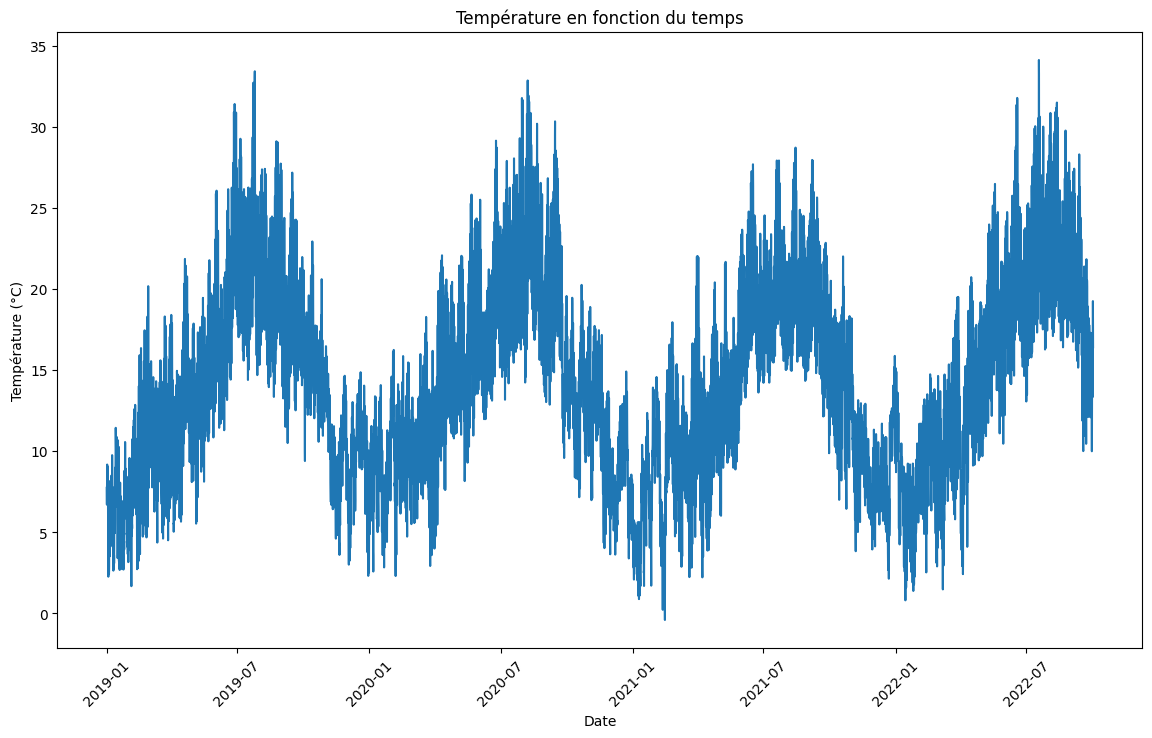

In [293]:
plt.figure(figsize=(14,8))
plt.plot(df_Date.index,df_Date['Température (°C)'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température en fonction du temps')
plt.show()

In [294]:
df_region = df[columns]
df_region = df_region.dropna()

# GroupBY : 'Date' & 'Region'

In [295]:
df_region = df_region.groupby(by=['Date','region (name)']).mean()
df_region.head()

Température (°C)  \
Date                region (name)                               
2019-01-01 01:00:00 Auvergne-Rhône-Alpes             6.766667   
                    Bourgogne-Franche-Comté          7.100000   
                    Bretagne                         8.450000   
                    Centre-Val de Loire              7.050000   
                    Corse                            6.300000   

                                             Pression au niveau mer  \
Date                region (name)                                     
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                   103330.0   
                    Bourgogne-Franche-Comté                103480.0   
                    Bretagne                               103760.0   
                    Centre-Val de Loire                    103650.0   
                    Corse                                  102690.0   

                                             Vitesse du vent moyen 10 mn  \
Date                region (name)                                          
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                        4.433333   
                    Bourgogne-Franche-Comté                     2.000000   
                    Bretagne                                    1.700000   
                    Centre-Val de Loire                         1.350000   
                    Corse                                       3.000000   

                                             Humidité  Pression station  \
Date                region (name)                                         
2019-01-01 01:00:00 Auvergne-Rhône-Alpes         88.0          100690.0   
                    Bourgogne-Franche-Comté      93.0          100670.0   
                    Bretagne                     82.0          103025.0   
                    Centre-Val de Loire          90.5          101915.0   
                    Corse                        78.0          102560.0   

                                             Rafales sur une période  \
Date                region (name)                                      
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                    8.333333   
                    Bourgogne-Franche-Comté                 3.700000   
                    Bretagne                                3.850000   
                    Centre-Val de Loire                     4.400000   
                    Corse                                   5.200000   

                                             Précipitations dans les 3 dernières heures  
Date                region (name)                                                        
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                                      -0.033333  
                    Bourgogne-Franche-Comté                                    0.000000  
                    Bretagne                                                   0.000000  
                    Centre-Val de Loire                                        0.000000  
                    Corse                                                      0.000000

In [296]:
df_region = df_region.reset_index(level=['Date','region (name)'])
df_region['region (name)'] = df_region['region (name)'].astype('string')
df_region

,Date,region (name),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
0,2019-01-01 01:00:00,Auvergne-Rhône-Alpes,6.766667,103330.0,4.433333,88.0,100690.0,8.333333,-0.033333
1,2019-01-01 01:00:00,Bourgogne-Franche-Comté,7.100000,103480.0,2.000000,93.0,100670.0,3.700000,0.000000
2,2019-01-01 01:00:00,Bretagne,8.450000,103760.0,1.700000,82.0,103025.0,3.850000,0.000000
3,2019-01-01 01:00:00,Centre-Val de Loire,7.050000,103650.0,1.350000,90.5,101915.0,4.400000,0.000000
4,2019-01-01 01:00:00,Corse,6.300000,102690.0,3.000000,78.0,102560.0,5.200000,0.000000
...,...,...,...,...,...,...,...,...,...
192730,2022-10-01 23:00:00,Pays de la Loire,17.400000,102200.0,4.500000,96.0,101890.0,10.000000,-0.100000
192731,2022-10-01 23:00:00,Provence-Alpes-Côte d'Azur,18.500000,102165.0,3.400000,78.5,101820.0,5.200000,0.000000
192732,2022-10-01 23:00:00,Saint-Pierre-et-Miquelon,12.200000,101570.0,8.000000,90.0,101490.0,12.300000,0.000000
192733,2022-10-01 23:00:00,Terres australes et antarctiques françaises,-0.300000,101500.0,3.600000,79.0,101120.0,5.700000,0.000000


## Création sous base de données pour chaque régions

In [297]:
from typing import Counter


regions = []
for region in df_region['region (name)']:
    regions.append(region)
regions = list(Counter(regions).keys())
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Corse',
 'Grand Est',
 'Guyane',
 'Hauts-de-France',
 'La Réunion',
 'Martinique',
 'Mayotte',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Saint-Pierre-et-Miquelon',
 'Île-de-France',
 'Terres australes et antarctiques françaises']

In [298]:
df_region = pd.get_dummies(df_region,columns=['region (name)'],prefix="",prefix_sep='')
df_region

,Date,Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,...,Martinique,Mayotte,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Saint-Pierre-et-Miquelon,Terres australes et antarctiques françaises,Île-de-France
0,2019-01-01 01:00:00,6.766667,103330.0,4.433333,88.0,100690.0,8.333333,-0.033333,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 01:00:00,7.100000,103480.0,2.000000,93.0,100670.0,3.700000,0.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 01:00:00,8.450000,103760.0,1.700000,82.0,103025.0,3.850000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 01:00:00,7.050000,103650.0,1.350000,90.5,101915.0,4.400000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 01:00:00,6.300000,102690.0,3.000000,78.0,102560.0,5.200000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192730,2022-10-01 23:00:00,17.400000,102200.0,4.500000,96.0,101890.0,10.000000,-0.100000,0,0,...,0,0,0,0,0,1,0,0,0,0
192731,2022-10-01 23:00:00,18.500000,102165.0,3.400000,78.5,101820.0,5.200000,0.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
192732,2022-10-01 23:00:00,12.200000,101570.0,8.000000,90.0,101490.0,12.300000,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0
192733,2022-10-01 23:00:00,-0.300000,101500.0,3.600000,79.0,101120.0,5.700000,0.000000,0,0,...,0,0,0,0,0,0,0,0,1,0


In [299]:



columns = ['Date','Température (°C)','Pression au niveau mer','Vitesse du vent moyen 10 mn','Humidité','Pression station','Rafales sur une période','Précipitations dans les 3 dernières heures']

AuvergneRhoneAlpes=df_region.loc[df_region[regions[0]]==1].reset_index(drop=True)
AuvergneRhoneAlpes = AuvergneRhoneAlpes[columns]
BourgogneFrancheComte=df_region.loc[df_region[regions[1]]==1].reset_index(drop=True)
BourgogneFrancheComte =BourgogneFrancheComte[columns]
Bretagne = df_region.loc[df_region[regions[2]]==1].reset_index(drop=True)
Bretagne =Bretagne[columns]
CentreValdeLoire= df_region.loc[df_region[regions[3]]==1].reset_index(drop=True)
CentreValdeLoire = CentreValdeLoire[columns]
Corse=df_region.loc[df_region[regions[4]]==1].reset_index(drop=True)
Corse = Corse[columns]
GrandEst=df_region.loc[df_region[regions[5]]==1].reset_index(drop=True)
GrandEst = GrandEst[columns]
Guyane=df_region.loc[df_region[regions[6]]==1].reset_index(drop=True)
Guyane = Guyane[columns]
HautsdeFrance=df_region.loc[df_region[regions[7]]==1].reset_index(drop=True)
HautsdeFrance = HautsdeFrance[columns]
LaReunion=df_region.loc[df_region[regions[8]]==1].reset_index(drop=True)
LaReunion = LaReunion[columns]
Martinique=df_region.loc[df_region[regions[9]]==1].reset_index(drop=True)
Martinique = Martinique[columns]
Mayotte=df_region.loc[df_region[regions[10]]==1].reset_index(drop=True)
Mayotte = Mayotte[columns]
Normandie=df_region.loc[df_region[regions[11]]==1].reset_index(drop=True)
Normandie = Normandie[columns]
NouvelleAquitaine=df_region.loc[df_region[regions[12]]==1].reset_index(drop=True)
NouvelleAquitaine = NouvelleAquitaine[columns]
Occitanie=df_region.loc[df_region[regions[13]]==1].reset_index(drop=True)
Occitanie = Occitanie[columns]
PaysdelaLoire=df_region.loc[df_region[regions[14]]==1].reset_index(drop=True)
PaysdelaLoire = PaysdelaLoire[columns]
ProvenceAlpesCotedAzur=df_region.loc[df_region[regions[15]]==1].reset_index(drop=True)
ProvenceAlpesCotedAzur = ProvenceAlpesCotedAzur[columns]
SaintPierreetMiquelon=df_region.loc[df_region[regions[16]]==1].reset_index(drop=True)
SaintPierreetMiquelon = SaintPierreetMiquelon[columns]
IledeFrance=df_region.loc[df_region[regions[17]]==1].reset_index(drop=True)
IledeFrance = IledeFrance[columns]
Terresaustralesetantarctiquesfrançaises=df_region.loc[df_region[regions[18]]==1].reset_index(drop=True)
Terresaustralesetantarctiquesfrançaises =Terresaustralesetantarctiquesfrançaises[columns]


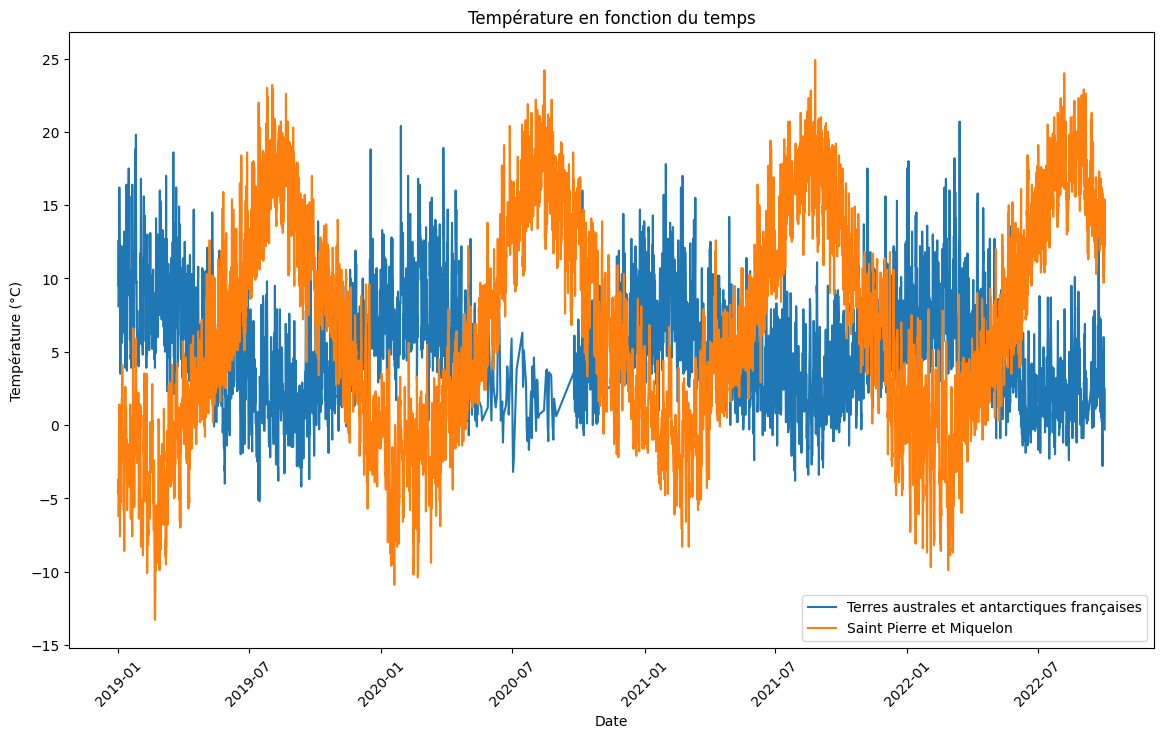

In [300]:
plt.figure(figsize=(14,8))


plt.plot(Terresaustralesetantarctiquesfrançaises['Date'],Terresaustralesetantarctiquesfrançaises['Température (°C)'])
plt.plot(SaintPierreetMiquelon[ 'Date'],SaintPierreetMiquelon['Température (°C)'])



plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température en fonction du temps')
plt.legend(['Terres australes et antarctiques françaises','Saint Pierre et Miquelon'])
plt.show()



# Trouver la périodicité

Nous pouvons imaginer une saisonalité de 1 ans soit 365 * 24 / 3 = 2920 car nous avons un relevé de données toutes les 3 heures.

Vérifions ça.

In [301]:
df_temporaire = pd.DataFrame(df_Date.index.astype('string'))
for year in range (df_temporaire.shape[0]):
    df_temporaire['Date'][year] = df_temporaire['Date'][year][0:4]

df_temporaire['Date'].value_counts()


2020    2926
2019    2918
2021    2918
2022    2192
Name: Date, dtype: Int64

On peut aussi imaginer une periodicité journalière. Il y a des observations toutes les trois heures, donc 24 / 3 = 8

# Décomposition STL

In [302]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

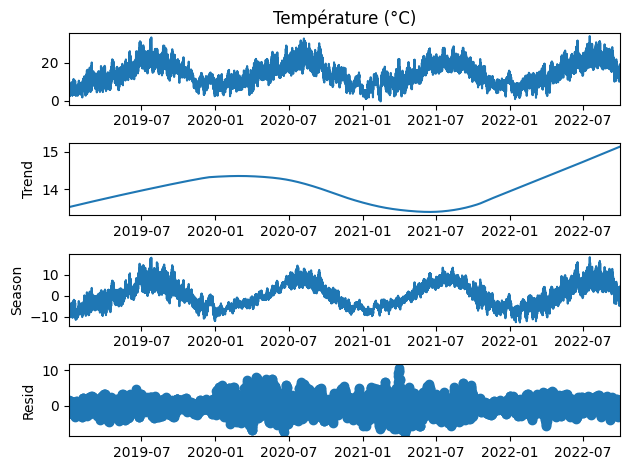

In [303]:
result = STL(df_Date['Température (°C)'], period=2920).fit()

_ = result.plot()

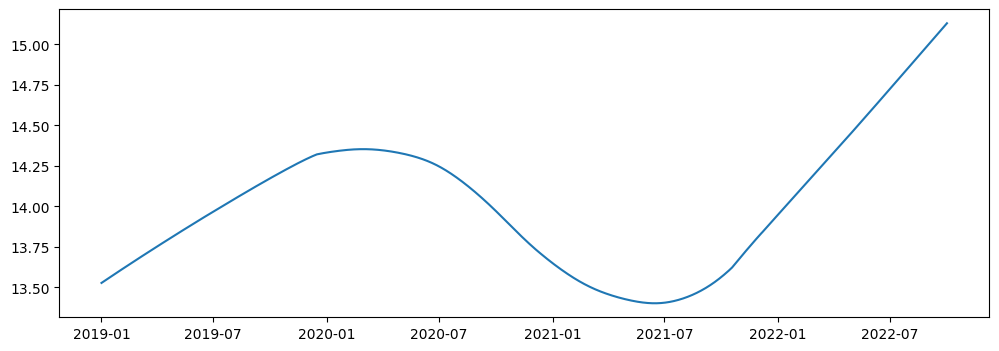

In [304]:
plt.figure(figsize=(12,4))
plt.plot(result.trend)

## Découpe la database en trois train / test / new data

In [305]:
def decoupe_data(data,div):
    data = data.reset_index(drop=True)
    mul = div - 1
    max = data.index.max()
    new_index = data.index.max() -400
    val = max / div 
    train_test_index = int(mul*val)
    return data.iloc[0:train_test_index],data.iloc[train_test_index:new_index],data.iloc[new_index:max]


In [ ]:
test =1

## NaiveForcaster
### Avec la database sur l'IDF


In [306]:
from sktime.forecasting.model_selection import temporal_train_test_split
#from sktime.performance_metrics.forecasting import smape_loss
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as smape_loss
from sktime.utils.plotting import plot_series

def plot_ys(*args, **kwargs):
    # restore previous behaviour (jfb)
    nb_series=len(args)
    plot_series(*args, **kwargs, markers=['' for k in range(nb_series)])

8193 2331


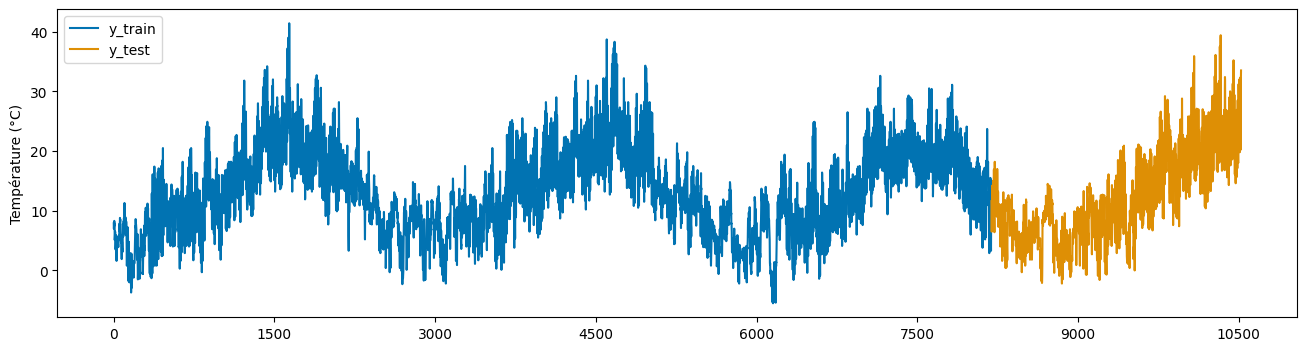

In [307]:
y = pd.Series(data=IledeFrance['Température (°C)']) #index=t[1:],
#y_train, y_test = temporal_train_test_split(y, test_size=2000)
y_train,y_test,new = decoupe_data(IledeFrance['Température (°C)'],4)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [308]:
fh = np.arange(1,len(y_test)+1) 


In [309]:
# Pour limiter le nombre de points, on ne prend que les 200 derniers
y_train = y_train[-4000:]


2890 13331118588099.15
2900 17002006315256.648
2910 11592277033129.826
2920 18547643253007.105
2930 17195210932475.49
la valeur la plus faible en loss correspond à une saisonalité de :  2910


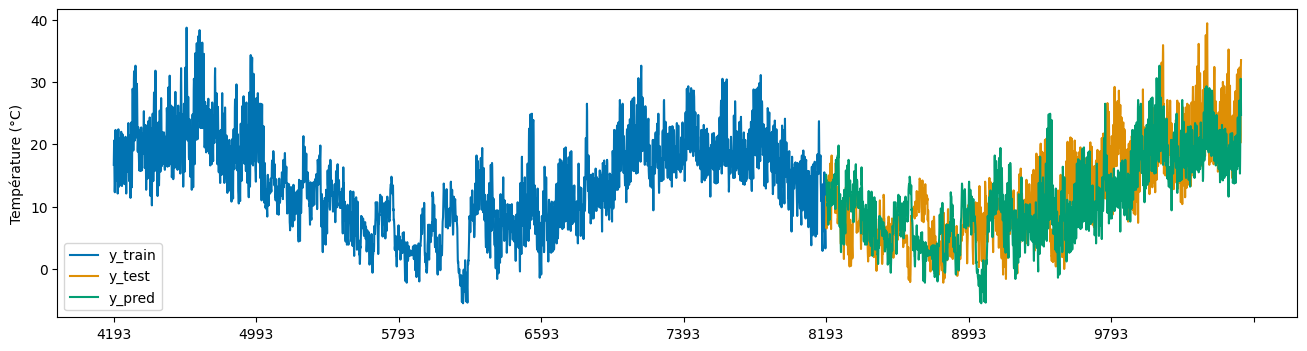

In [310]:
# using sktime 
res = []
val = [2890,2900,2910, 2920,2930]
from sktime.forecasting.naive import NaiveForecaster
for i in val:
    forecaster = NaiveForecaster(strategy="last",sp=i)
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    res.append(smape_loss(y_pred, y_test))
    print(i,res[-1])
saisonalite = val[res.index(min(res))]

print("la valeur la plus faible en loss correspond à une saisonalité de : ",saisonalite)

forecaster = NaiveForecaster(strategy="last",sp=saisonalite)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smape_loss(y_pred, y_test)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);


# #Analyse

## Approches réduction

## Exponential smoothing

## Sarimax

## DEEP

# features
créer les colonnes évoquées dans les slides